In [152]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [153]:
%matplotlib inline

# Analysis of Top Investment Banks

## Research Questions to Answer:

* What is the market share of each of the top investment banks in terms of revenue and assets? (pie charts?)
* How has the revenue and profitability of the top investment banks evolved over the past five years? (line charts?)
* What are the key drivers of revenue and profitability for investment banks? 
* What is the geographic distribution of revenue and assets for the top investment banks? (world map?)
* How do the top investment banks compare in terms of risk management and governance?

In [154]:
import pandas as pd
import numpy as np
import json
import requests
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import hvplot.pandas
from config import api_key

In [155]:
bank_data_to_load = "DATA/final_bank_data.csv"
#WARNING: tester_file.csv contains placeholder values, replace with actual data
bank_data_df = pd.read_csv(bank_data_to_load)
bank_data_df

,Bank,Fiscal Year,Total IB Fees,Market Share %,Net Interest Income,Non Interest Income,Total Revenue,Total Non-Interest Expense,Net Income,Total Assets,Total Liabilities,Equity,IB Fees as a % of Net Revenue,IB Fees as a % of Non-Interest Income
0,Jefferies,2021,4366,0.06,89,8097,8185,5760,2426,604040,496740,107300,0.53,0.54
1,Jefferies,2020,2501,0.05,52,5958,6011,4783,1227,531180,435300,95880,0.42,0.42
2,Jefferies,2019,1527,0.04,138,3755,3893,3530,363,494600,397060,97540,0.39,0.41
3,Jefferies,2018,1905,0.05,1294,2470,3764,3436,328,471310,369070,102240,0.51,0.77
4,Jefferies,2017,1764,0.04,993,3084,4077,3295,783,471690,364780,106910,0.43,0.57
5,Credit Suisse,2021,2717,0.04,6374,18520,24894,20940,3954,829037,780523,48514,0.11,0.15
6,Credit Suisse,2020,2458,0.05,6682,18471,25153,20027,5126,920082,871839,48243,0.10,0.13
7,Credit Suisse,2019,1705,0.04,7217,15908,23125,17937,5188,809724,764765,44959,0.07,0.11
8,Credit Suisse,2018,1319,0.03,7105,14101,21206,17540,3666,779438,724896,54542,0.06,0.09
9,Credit Suisse,2017,534,0.01,6730,14721,21451,19395,2056,817293,773992,43302,0.02,0.04


In [156]:
#To Do: Excel file numbers all measured in millions
# $ taken out in Excel  
# IB %s formatted to % ? in Excel
# Get unique colors for each and make them the same across all charts

color_scheme = ["darkred","orange","purple","green","darkblue","pink","darkgreen","red","teal","blue",]

In [157]:
jeff_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Jefferies',['Total IB Fees']]
jeff_plot_df = jeff_plot_df.iloc[::-1]

suisse_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Credit Suisse',['Total IB Fees']]
suisse_plot_df = suisse_plot_df.iloc[::-1]

citi_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Citi Bank',['Total IB Fees']]
citi_plot_df = citi_plot_df.iloc[::-1]

bar_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Barclays',['Total IB Fees']]
bar_plot_df = bar_plot_df.iloc[::-1]

gs_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Goldman Sachs',['Total IB Fees']]
gs_plot_df = gs_plot_df.iloc[::-1]

jp_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'JP Morgan',['Total IB Fees']]
jp_plot_df = jp_plot_df.iloc[::-1]

rbc_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'RBC Bank',['Total IB Fees']]
rbc_plot_df = rbc_plot_df.iloc[::-1]

deutsche_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Deutsche Bank',['Total IB Fees']]
deutsche_plot_df = deutsche_plot_df.iloc[::-1]

bac_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Bank of America',['Total IB Fees']]
bac_plot_df = bac_plot_df.iloc[::-1]

ms_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Morgan Stanley',['Total IB Fees']]
ms_plot_df = ms_plot_df.iloc[::-1]


In [158]:
bar_plot_df['Total IB Fees']

19    3037
18    3042
17    3042
16    3277
15    4391
Name: Total IB Fees, dtype: int64

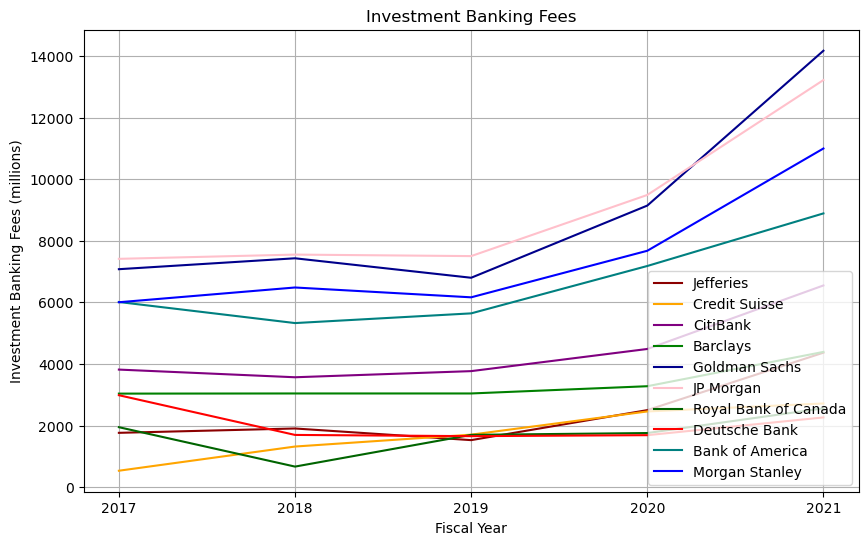

In [159]:
x_axis = np.sort(bank_data_df['Fiscal Year'].unique(), axis=-1)
x_tick_locations = [value for value in x_axis]
plt.figure(0,figsize=(10,6))

jeff = plt.plot(x_axis, jeff_plot_df['Total IB Fees'], color_scheme[0], label="Jefferies")
suisse = plt.plot(x_axis, suisse_plot_df['Total IB Fees'], color_scheme[1], label="Credit Suisse")
citi = plt.plot(x_axis, citi_plot_df['Total IB Fees'], color_scheme[2], label="CitiBank")
bar = plt.plot(x_axis, bar_plot_df['Total IB Fees'], color_scheme[3], label="Barclays")
gs = plt.plot(x_axis, gs_plot_df['Total IB Fees'], color_scheme[4], label="Goldman Sachs")
jp = plt.plot(x_axis, jp_plot_df['Total IB Fees'], color_scheme[5], label="JP Morgan")
rbc = plt.plot(x_axis, rbc_plot_df['Total IB Fees'], color_scheme[6], label="Royal Bank of Canada")
d = plt.plot(x_axis, deutsche_plot_df['Total IB Fees'], color_scheme[7], label="Deutsche Bank")
bac = plt.plot(x_axis, bac_plot_df['Total IB Fees'], color_scheme[8], label="Bank of America")
ms = plt.plot(x_axis, ms_plot_df['Total IB Fees'], color_scheme[9], label="Morgan Stanley")

plt.xticks(x_tick_locations)
legend = plt.legend(loc='lower right')
plt.title("Investment Banking Fees")
plt.xlabel("Fiscal Year")
plt.ylabel("Investment Banking Fees (millions)")
plt.grid()
plt.show()

AttributeError: 'list' object has no attribute 'set_color'

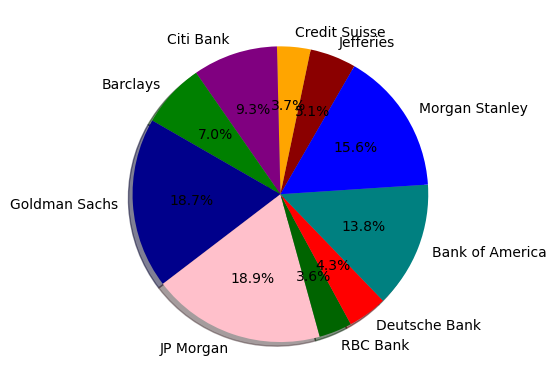

In [160]:
bank_list = ['Jefferies', 'Credit Suisse', 'Citi Bank', 'Barclays',
       'Goldman Sachs', 'JP Morgan', 'RBC Bank', 'Deutsche Bank',
       'Bank of America', 'Morgan Stanley']
bank_pie = np.array([jeff_plot_df['Total IB Fees'].sum(), suisse_plot_df['Total IB Fees'].sum(), citi_plot_df['Total IB Fees'].sum(), bar_plot_df['Total IB Fees'].sum(),
                     gs_plot_df['Total IB Fees'].sum(), jp_plot_df['Total IB Fees'].sum(), rbc_plot_df['Total IB Fees'].sum(), deutsche_plot_df['Total IB Fees'].sum(), bac_plot_df['Total IB Fees'].sum(),
                     ms_plot_df['Total IB Fees'].sum() ])
banks_cumulative = plt.pie(bank_pie, labels=bank_list, autopct="%1.1f%%", shadow=True, startangle=60, colors=color_scheme)
for autotext in banks_cumulative:
    autotext.set_color('white')

plt.figure(1)
plt.title("Investment Banking Fees, 2017-2021 Cumulative")
plt.show()


In [161]:
jeff_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'Jefferies',['IB Fees as a % of Net Revenue']]
jeff_percent_df = jeff_percent_df.iloc[::-1]

suisse_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'Credit Suisse',['IB Fees as a % of Net Revenue']]
suisse_percent_df = suisse_percent_df.iloc[::-1]

citi_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'Citi Bank',['IB Fees as a % of Net Revenue']]
citi_percent_df = citi_percent_df.iloc[::-1]
                                                                        
bar_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'Barclays',['IB Fees as a % of Net Revenue']]
bar_percent_df = bar_percent_df.iloc[::-1]

gs_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'Goldman Sachs',['IB Fees as a % of Net Revenue']]
gs_percent_df = gs_percent_df.iloc[::-1]

jp_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'JP Morgan',['IB Fees as a % of Net Revenue']]
jp_percent_df = jp_percent_df.iloc[::-1]
                                                                
rbc_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'RBC Bank',['IB Fees as a % of Net Revenue']]
rbc_percent_df = rbc_percent_df.iloc[::-1]

deutsche_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'Deutsche Bank',['IB Fees as a % of Net Revenue']]
deutsche_percent_df = deutsche_percent_df.iloc[::-1]

bac_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'Bank of America',['IB Fees as a % of Net Revenue']]
bac_percent_df = bac_percent_df.iloc[::-1]

ms_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'Morgan Stanley',['IB Fees as a % of Net Revenue']]
ms_percent_df = ms_percent_df.iloc[::-1]

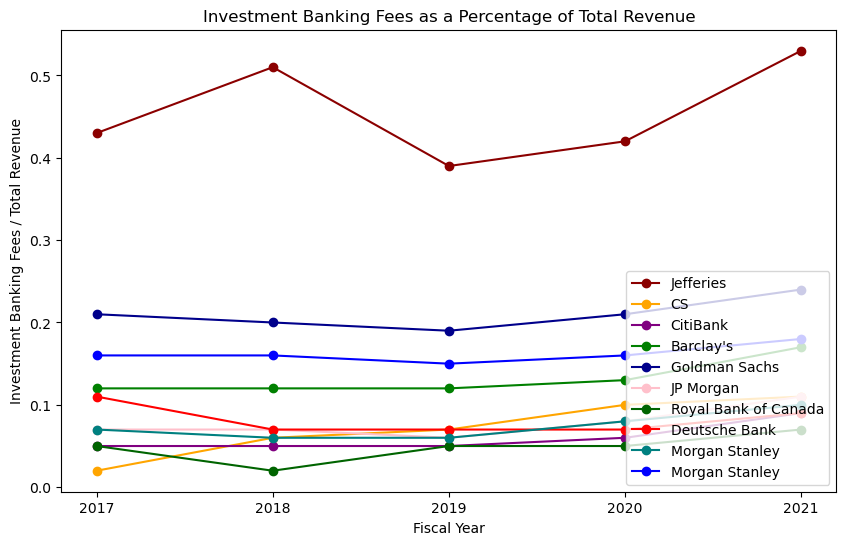

In [162]:
x_axis = np.sort(bank_data_df['Fiscal Year'].unique(), axis=-1)
#y_axis = np.arange(0,105, 5)
plt.figure(2,figsize=(10,6))
jeff_percent = plt.plot(x_axis, jeff_percent_df['IB Fees as a % of Net Revenue'], marker ='o', color = color_scheme[0], label="Jefferies")
suisse_percent = plt.plot(x_axis, suisse_percent_df['IB Fees as a % of Net Revenue'], marker ='o', color = color_scheme[1], label="CS")
citi = plt.plot(x_axis, citi_percent_df['IB Fees as a % of Net Revenue'], marker ='o', color = color_scheme[2], label="CitiBank")
bar = plt.plot(x_axis, bar_percent_df['IB Fees as a % of Net Revenue'], marker ='o', color = color_scheme[3], label="Barclay's")
gs = plt.plot(x_axis, gs_percent_df['IB Fees as a % of Net Revenue'], marker ='o', color = color_scheme[4], label="Goldman Sachs")
jp = plt.plot(x_axis, jp_percent_df['IB Fees as a % of Net Revenue'], marker ='o', color = color_scheme[5], label="JP Morgan")
rbc = plt.plot(x_axis, rbc_percent_df['IB Fees as a % of Net Revenue'], marker ='o', color = color_scheme[6], label="Royal Bank of Canada")
d = plt.plot(x_axis, deutsche_percent_df['IB Fees as a % of Net Revenue'], marker='o', color = color_scheme[7], label="Deutsche Bank")
bac = plt.plot(x_axis, bac_percent_df['IB Fees as a % of Net Revenue'], marker='o', color = color_scheme[8], label="Bank of America")
ms = plt.plot(x_axis, ms_percent_df['IB Fees as a % of Net Revenue'], marker='o', color = color_scheme[9], label="Morgan Stanley")
plt.xticks(x_tick_locations)
plt.title("Investment Banking Fees as a Percentage of Total Revenue")
plt.xlabel("Fiscal Year")
plt.ylabel("Investment Banking Fees / Total Revenue")
legend = plt.legend(loc='lower right')
plt.show()



What is the market share of each of the top investment banks in terms of revenue and assets? (pie charts?)

In [163]:
## pie chart of market share, each bank

In [164]:
bank_data_df.head()

,Bank,Fiscal Year,Total IB Fees,Market Share %,Net Interest Income,Non Interest Income,Total Revenue,Total Non-Interest Expense,Net Income,Total Assets,Total Liabilities,Equity,IB Fees as a % of Net Revenue,IB Fees as a % of Non-Interest Income
0,Jefferies,2021,4366,0.06,89,8097,8185,5760,2426,604040,496740,107300,0.53,0.54
1,Jefferies,2020,2501,0.05,52,5958,6011,4783,1227,531180,435300,95880,0.42,0.42
2,Jefferies,2019,1527,0.04,138,3755,3893,3530,363,494600,397060,97540,0.39,0.41
3,Jefferies,2018,1905,0.05,1294,2470,3764,3436,328,471310,369070,102240,0.51,0.77
4,Jefferies,2017,1764,0.04,993,3084,4077,3295,783,471690,364780,106910,0.43,0.57


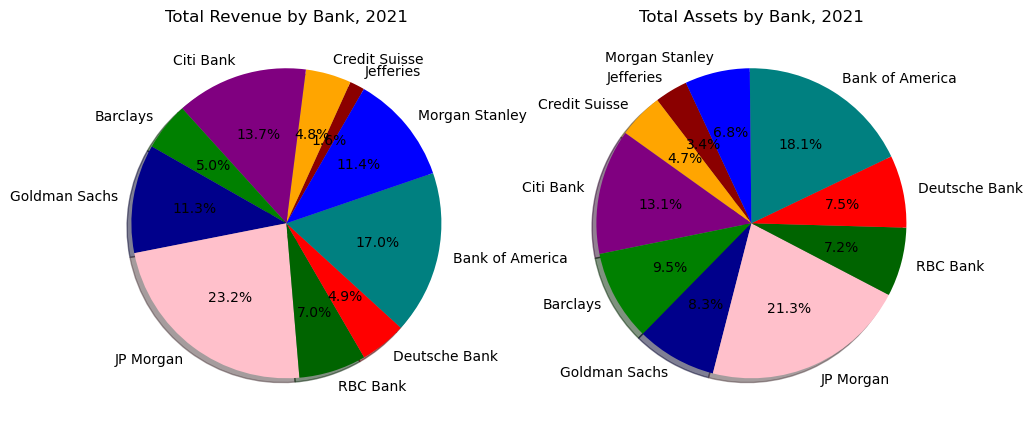

In [168]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(11,11))

revenue_2021 = bank_data_df.groupby('Bank').head(1)
bank_list = []
revenue_list = []

for row in revenue_2021.iterrows():
    bank_list = revenue_2021['Bank']
    revenue_list = revenue_2021['Total Revenue']
TR_pie = np.array(revenue_list)
ax1.pie(TR_pie, labels=bank_list, autopct="%1.1f%%", shadow=True, startangle=60, colors=color_scheme)
ax1.set_title("Total Revenue by Bank, 2021")

assets_2021 = bank_data_df.groupby('Bank').head(1)
bank_list = []
assets_list = []
for row in assets_2021.iterrows():
    bank_list = assets_2021['Bank']
    assets_list = assets_2021['Total Assets']
assets_pie = np.array(assets_list)
ax2.pie(assets_list, labels=bank_list, autopct="%1.1f%%", shadow=True, startangle=115, colors=color_scheme)
ax2.set_title("Total Assets by Bank, 2021")

plt.show()

In [166]:
#just ideas

locations_df = pd.DataFrame({
    "Frame": ["Jefferies", "Credit Suisse", "Citi Bank", "Barclays", "Goldman Sachs",
              "JP Morgan", "RBC Bank", "Deutsche Bank", "Bank of America", "Morgan Stanley"],  #, "Classical", "Modern", "Wood", "Cardboard"],
    "City": ["New York", "Zurich", "New York", "London", "New York",
             "New York", "Toronto", "Frankfurt", "Charlotte", "New York"], #, 12.50, 10.00, 5.00, 1.00],
    "Lat": [40.45369, 47.3769, 40.7207, 51.50506, 40.7149, 
            40.7558, 43.3848, 50.0649, 35.13, 40.7598], #, 200, 150, 300, "N/A"],
    "Lng": [-73.582780, 8.5417, -74.0112, -0.01431, -74.01450, 
            -73.9754, -79.2249, 8.4005, -80.50323, -73.9855] #, 200, 150, 300, "N/A"]
})
locations_df
#world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

,Frame,City,Lat,Lng
0,Jefferies,New York,40.45369,-73.58278
1,Credit Suisse,Zurich,47.37690,8.54170
2,Citi Bank,New York,40.72070,-74.01120
3,Barclays,London,51.50506,-0.01431
4,Goldman Sachs,New York,40.71490,-74.01450
5,JP Morgan,New York,40.75580,-73.97540
6,RBC Bank,Toronto,43.38480,-79.22490
7,Deutsche Bank,Frankfurt,50.06490,8.40050
8,Bank of America,Charlotte,35.13000,-80.50323
9,Morgan Stanley,New York,40.75980,-73.98550


In [167]:
%%capture --no-display

# Configure the map plot
bank_plot = locations_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 500,
    #size = medium,
    scale = 1.0,
    color = "City"
)

# Display the map
bank_plot


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City)